# MNIST for begginers on tf
## A softmax regesion approach to MNIST classification
- Code here is taken from this link https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners

- Blog on Soft max in the context of MNIST (Very detailed explinations in maths and code form)
http://neuralnetworksanddeeplearning.com/chap3.html#softmax

- Blof that explaines cross entropy loss in detail
http://colah.github.io/posts/2015-09-Visual-Information/

 (Softmax is often performed as a final step in more complex models)

**First we get the data**
The MNIST data is split into three parts: 55,000 data points of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation). This split is very important: it's essential in machine learning that we have separate data which we don't learn from so that we can make sure that what we've learned actually generalizes!

As mentioned earlier, every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are mnist.train.images and the training labels are mnist.train.labels.

**Each image is 28 pixels by 28 pixels.**

We can flatten this array into a vector of **28x28 = 784 numbers**. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space, with a very rich structure (warning: computationally intensive visualizations).

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


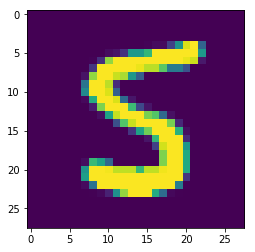

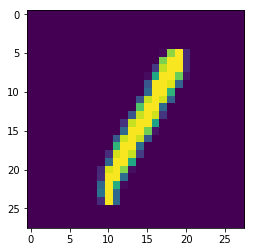

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [28]:
# https://stackoverflow.com/questions/42353676/display-mnist-image-using-matplotlib
# Printing out image 
# Tested with Python 3.5.2 with tensorflow and matplotlib installed.
from matplotlib import pyplot as plt
import numpy as np

# # Get data
# # dont forget to manage your .gitignore MNIST_data/
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

# Get a batch of two random images and show in a pop-up window.
batch_xs, batch_ys = mnist.test.next_batch(2)
gen_image(batch_xs[0]).show()
gen_image(batch_xs[1]).show()

mnist.train.images

# Build the model
We want to be able to input any number of MNIST images, each flattened into a 784-dimensional vector. We represent this as a 2-D tensor of floating-point numbers, with a shape [None, 784]. (Here None means that a dimension can be of any length.)

x isn't a specific value. It's a ***placeholder***, a value that we'll input when we ask TensorFlow to run a computation. 

In [29]:
import tensorflow as tf

x = tf.placeholder(tf.float32, [None, 784])

We also need the weights and biases for our model. We could imagine treating these like additional inputs, but TensorFlow has an even better way to handle it: ***Variable***. A Variable is a modifiable tensor that lives in TensorFlow's graph of interacting operations. It can be used and even modified by the computation. For machine learning applications, one generally has the model parameters be ***Variables***.

We create these Variables by giving tf.Variable the initial value of the Variable: in this case, we initialize both W and b as tensors full of zeros. Since we are going to learn W and b, it doesn't matter very much what they initially are.

On Shape:

Notice that W has a shape of [784, 10] because we want to multiply the 784-dimensional image vectors by it to produce 10-dimensional vectors of evidence for the difference classes. b has a shape of [10] so we can add it to the output.

In [30]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [31]:
#Lol impliment model
# Y = softmax(Wx + b)
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Train the model
Using Cross entropy as the cost function 
> In some rough sense, the cross-entropy is measuring how inefficient our predictions are for describing the truth.
https://www.tensorflow.org/versions/r1.1/get_started/mnist/beginners#Training

Information on backpropogation
http://colah.github.io/posts/2015-08-Backprop/




In [32]:
# Define Placeholder
y_ = tf.placeholder(tf.float32, [None, 10])
# implement the cross-entropy function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In your code, consider using tf.nn.softmax_cross_entropy_with_logits instead

Now that we know what we want our model to do, it's very easy to have TensorFlow train it to do so. Because TensorFlow knows the entire graph of your computations, it can automatically use the **backpropagation** algorithm to efficiently determine how your variables affect the loss you ask it to minimize. Then it can apply your choice of optimization algorithm to modify the variables and reduce the loss.


There other ways to optimise though: https://www.tensorflow.org/versions/r1.1/api_guides/python/train#Optimizers

In [33]:
#Train model at a given step
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [34]:
# make a new TF session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run() #Dont forget to intitialise the variables for the session!

### training loop
Each step of the loop, we get a "batch" of one hundred random data points from our training set. We run train_step feeding in the batches data to replace the placeholders.

Using small batches of random data is called stochastic training -- in this case, stochastic gradient descent. Ideally, we'd like to use all our data for every step of training because that would give us a better sense of what we should be doing, but that's expensive. So, instead, we use a different subset every time. Doing this is cheap and has much of the same benefit.

In [35]:
#training loop of 1000 iterations
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})